In [3]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [83]:
df = pd.read_csv("../data/adult.csv")

df.replace("?", np.nan, inplace=True)
print(df["sex"].unique())

df

['Male' 'Female']


,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [59]:
gender_counts = df["sex"].value_counts()

gender_counts

Male      20380
Female     9782
Name: sex, dtype: int64

# Task 2
Find the average age of men in dataset

In [68]:
men_df = df[df["sex"] == "Male"]

average_age_men = men_df["age"].mean()

average_age_men

['Male' 'Female']


# Task 3
Get the percentage of people from Poland (native-country)

In [69]:
total_rows = len(df)

poland_df = df[df["native-country"] == "Poland"]

poland_count = len(poland_df)
percentage_poland = (poland_count / total_rows) * 100

percentage_poland


['Male' 'Female']


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [71]:
greater_than_50K_df = df[df["salary"] == ">50K"]

mean_age_gt_50K = greater_than_50K_df["age"].mean()
std_age_gt_50K = greater_than_50K_df["age"].std()


less_than_equal_50K_df = df[df["salary"] == "<=50K"]

mean_age_le_50K = less_than_equal_50K_df["age"].mean()
std_age_le_50K = less_than_equal_50K_df["age"].std()

['Male' 'Female']


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [72]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
high_income_df = df[df["salary"] == ">50K"]

no_higher_education_df = high_income_df[~high_income_df["education"].isin(higher_education)]


no_higher_education_df

['Male' 'Female']


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [74]:
age_statistics = df.groupby("education")["age"].describe()

age_statistics

['Male' 'Female']


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [75]:
men_df = df[df["sex"] == "Male"].copy()

men_df.loc[:, "is_married"] = men_df["marital-status"].str.startswith("Married")

married_men_df = men_df[men_df["is_married"]]
non_married_men_df = men_df[~men_df["is_married"]]

married_salary_counts = married_men_df["salary"].value_counts(normalize=True) * 100

non_married_salary_counts = non_married_men_df["salary"].value_counts(normalize=True) * 100

print(married_salary_counts)
print(non_married_salary_counts)

<=50K    55.201566
>50K     44.798434
Name: salary, dtype: float64
<=50K    91.150559
>50K      8.849441
Name: salary, dtype: float64
['Male' 'Female']


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [77]:
max_hours_per_week = df["hours-per-week"].max()

max_hours_count = df[df["hours-per-week"] == max_hours_per_week].shape[0]

max_hours_count

['Male' 'Female']


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

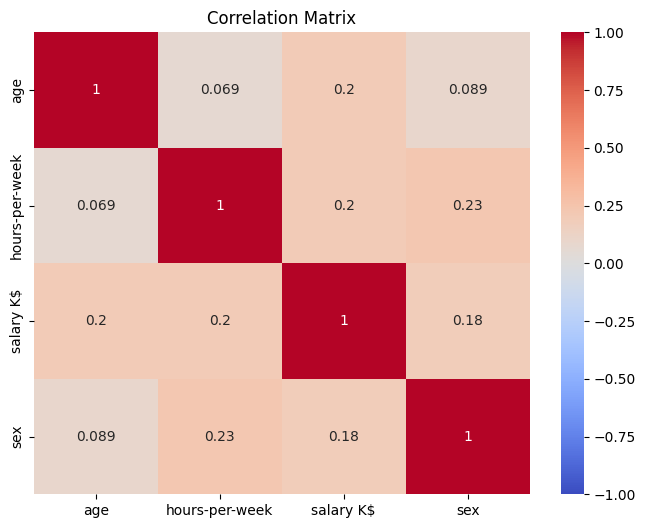

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns


df_copy = df.copy()
df_copy["sex"] = df_copy["sex"].map({"Male": 1, "Female": 0})
df_filtered = df_copy[["age", "hours-per-week", "salary K$", "sex"]].copy()

correlation_matrix = df_filtered.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()